In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [51]:
HOUSING_PATH = "data/housing.csv"

In [52]:


housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Масштабирование:
а. Нормализовать признак - median_income

In [53]:
housing.median_income.shape

(20640,)

In [54]:
housing.median_income.values.reshape(-1, 1).shape

(20640, 1)

In [55]:

standard_scaler = preprocessing.StandardScaler()

np_scaled = standard_scaler.fit_transform(housing.median_income.values.reshape(-1, 1))
housing['median_income_norm'] = pd.DataFrame(np_scaled)
# housing.head()

In [56]:
# housing.describe()

In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
median_income_norm    20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


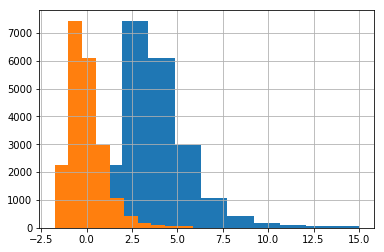

In [58]:
housing.median_income.hist()
housing.median_income_norm.hist()

### 1 б. Привести признак - population к масштабу от 0 до 100

In [59]:
# housing.population.describe()

In [60]:
h_p = housing.population.values.reshape(-1, 1) 
housing.population.values.reshape(-1, 1).shape

(20640, 1)

/home/darya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3383137dd8>]],
      dtype=object)

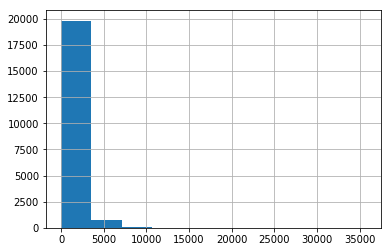

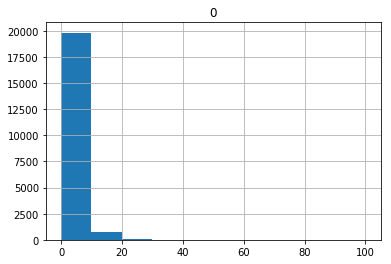

In [61]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
np_scaled = min_max_scaler.fit_transform(h_p)
housing.population_0_100 = pd.DataFrame(np_scaled)
housing.population.hist()
housing.population_0_100.hist()

### 2. 2.Заполнение пропусков:
а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity
Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [62]:
housing_ocean = housing.groupby('ocean_proximity', as_index=False).agg({"total_bedrooms": "mean"})
housing_ocean

,ocean_proximity,total_bedrooms
0,<1H OCEAN,546.539185
1,INLAND,533.881619
2,ISLAND,420.400000
3,NEAR BAY,514.182819
4,NEAR OCEAN,538.615677


In [63]:
housing[housing.total_bedrooms.isna()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,0.265468
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,-1.184914
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,-0.681381
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,0.567556
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,0.018754


In [64]:
for l, v in housing_ocean.values:
    housing.loc[(housing.total_bedrooms.isna() & (housing.ocean_proximity == l)), 'total_bedrooms'] = v

In [65]:
housing.total_bedrooms.mean()

537.8808920871179

In [66]:
housing[housing.total_bedrooms.isna()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm


### 3. Категорийные атрибуты:
а. Посчитать среднее кол-во комнат в строке (total_rooms/households)

In [68]:
# housing.info()

In [69]:
housing['mean_rooms'] = housing.total_rooms/ housing.households

(0, 25)

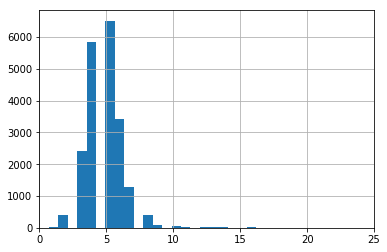

In [77]:
housing.mean_rooms.hist(bins=200)
plt.xlim((0,25))

3 б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

(0, 25)

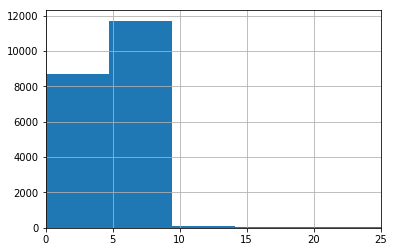

In [79]:
housing['mean_rooms'] = housing['mean_rooms'].astype(int)
housing.mean_rooms.hist(bins=30)
plt.xlim((0,25))

In [85]:
housing.mean_rooms[housing.mean_rooms >10] = 10

/home/darya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


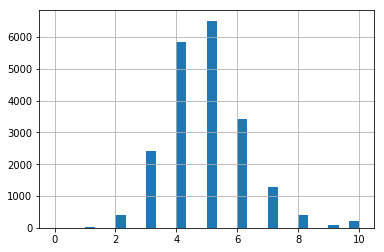

In [87]:
housing.mean_rooms.hist(bins=30)